In [1]:
import pandas as pd
import time
import numpy as np
#from sklearn.cross_validation import train_test_split
import xgboost as xgb
import copy
import matplotlib.pyplot as plt
import scikitplot as skplt



### data load 

In [2]:
path = './data/'

application_train = pd.read_csv(path + "application_train.csv" )#,nrows=10000) #, skiprows=1, nrows=40000
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application_train.describe() #(include='all')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [4]:

print(np.divide( np.sum(application_train.TARGET), application_train.shape[0])*100)
#application_train.hist("TARGET")

8.072881945686495


In [5]:
#application_train = application_train[application_train['SK_ID_CURR'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]

application_train = application_train.select_dtypes(include=["int","bool","float"])
application_train.shape

(307511, 106)

In [6]:
y = application_train["TARGET"]
X = application_train.drop(["TARGET"], axis=1)

train_index = np.random.choice(len(X), round(len(X) * 0.7), replace=False)
test_index = np.array(list(set(range(len(X))) - set(train_index)))
                               
train_X = X.iloc[train_index]
train_y = y.iloc[train_index]
test_X = X.iloc[test_index]
test_y = y.iloc[test_index]

dtrain = xgb.DMatrix(train_X,label=train_y)
dtest = xgb.DMatrix(test_X)

In [7]:
print(np.divide( np.sum(train_y), train_y.shape[0])*100)
print(np.divide( np.sum(test_y), test_y.shape[0])*100)


8.046158563212517
8.135236794467389


[0]	train-auc:0.731923	train-ams@0:44.1428
[1]	train-auc:0.749201	train-ams@0:45.4849
[2]	train-auc:0.766949	train-ams@0:46.986
[3]	train-auc:0.779683	train-ams@0:48.2773
[4]	train-auc:0.791533	train-ams@0:49.6327
[5]	train-auc:0.799588	train-ams@0:50.5899
[6]	train-auc:0.803737	train-ams@0:51.1803
[7]	train-auc:0.810526	train-ams@0:52.0172
[8]	train-auc:0.816114	train-ams@0:52.6106
[9]	train-auc:0.821418	train-ams@0:53.2861
[10]	train-auc:0.826828	train-ams@0:54.1469
[11]	train-auc:0.830388	train-ams@0:54.7464
[12]	train-auc:0.834473	train-ams@0:55.2982
[13]	train-auc:0.837638	train-ams@0:55.811
[14]	train-auc:0.840652	train-ams@0:56.4804
[15]	train-auc:0.843348	train-ams@0:56.9272
[16]	train-auc:0.85022	train-ams@0:57.9325
[17]	train-auc:0.853691	train-ams@0:58.4048
[18]	train-auc:0.857409	train-ams@0:59.2599
[19]	train-auc:0.86091	train-ams@0:60.0377
11.499310970306396
41.09243059846292


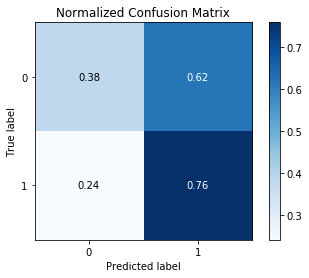

In [17]:





param = {'max_depth':10, 'eta':1, 'silent':0, 'objective':'binary:logistic','scale_pos_weight': 150 ,'nthread': 4}
num_round = 20
param['eval_metric'] = ['auc', 'ams@0']
evallist = [ (dtrain, 'train')]
start = time.time()

bst = xgb.train(param, dtrain, num_round, evallist)
print(time.time()-start)
pred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)
pred = np.round(pred)

print( sum(test_y==pred)/len(pred)*100 )

ypred = np.round(pred)

skplt.metrics.plot_confusion_matrix(test_y, ypred, normalize=True)
plt.show()